<a href="https://colab.research.google.com/github/shreyansh273/GTx_6501/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving uscrime.txt to uscrime.txt


In [2]:
uploaded = files.upload()

Saving germancredit.txt to germancredit.txt


In [3]:
uploaded = files.upload()

Saving german.doc to german.doc


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
crime = pd.read_csv("uscrime.txt", sep="\t")
credit = pd.read_csv("germancredit.txt", sep=",", header=None)

In [ ]:
def get_results(y_test, y_train, pred_test, pred_train):
  print("Test Confusion Matrix")
  print(confusion_matrix(y_test, pred_test))
  print("\nTrain Confusion Matrix")
  print(confusion_matrix(y_train, pred_train))
  print("\nTest Report")
  print(classification_report(y_test, pred_test))
  print("\nTrain Report")
  print(classification_report(y_train, pred_train))

In [6]:
credit.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'installment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephone',
                   'foreign','target']

In [7]:
f = open('german.doc')
german_doc = f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_bal           1000 non-null   object
 1   duration              1000 non-null   int64 
 2   payment_status        1000 non-null   object
 3   purpose               1000 non-null   object
 4   credit_amount         1000 non-null   int64 
 5   savings_bond_value    1000 non-null   object
 6   employed_since        1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   sex_marital           1000 non-null   object
 9   guarantor             1000 non-null   object
 10  residence_since       1000 non-null   int64 
 11  most_valuable_asset   1000 non-null   object
 12  age                   1000 non-null   int64 
 13  concurrent_credits    1000 non-null   object
 14  type_of_housing       1000 non-null   object
 15  number_of_existcr     1000 non-null   i

In [8]:
credit.head()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,installment_rate,sex_marital,guarantor,residence_since,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephone,foreign,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
credit.describe()

,duration,credit_amount,installment_rate,residence_since,age,number_of_existcr,number_of_dependents,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [12]:
num_col = ['duration','credit_amount','installment_rate', 'residence_since','age','number_of_existcr','number_of_dependents']
cat_col = [i for i in credit.columns[0:len(credit.columns)-1] if i not in num_col]

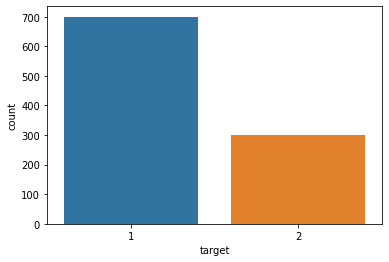

In [53]:
sns.countplot(x='target', data=credit)

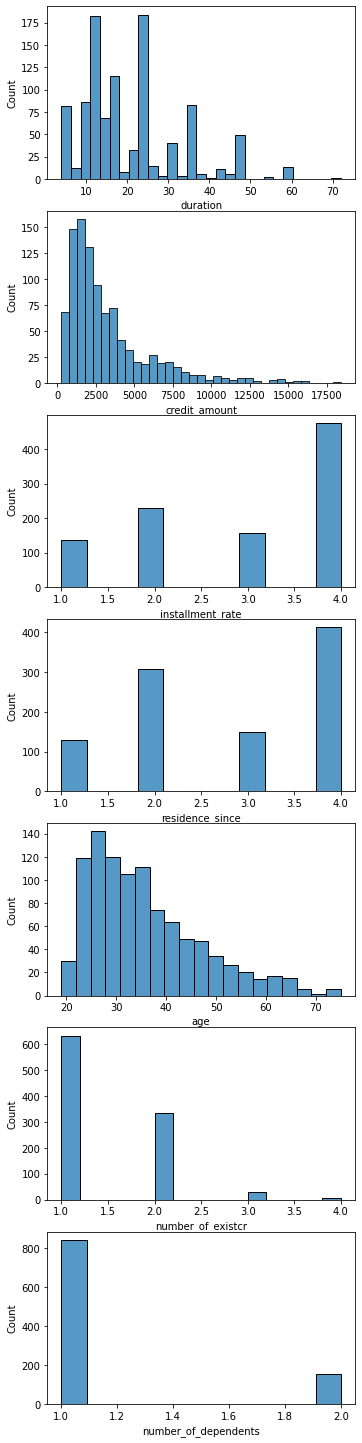

In [17]:
num_rows = len(num_col)
fig, ax= plt.subplots(num_rows, 1 , figsize=(5,20))
fig.tight_layout()
for i in range(num_rows):
  sns.histplot(x=num_col[i], data=credit, ax=ax[i])

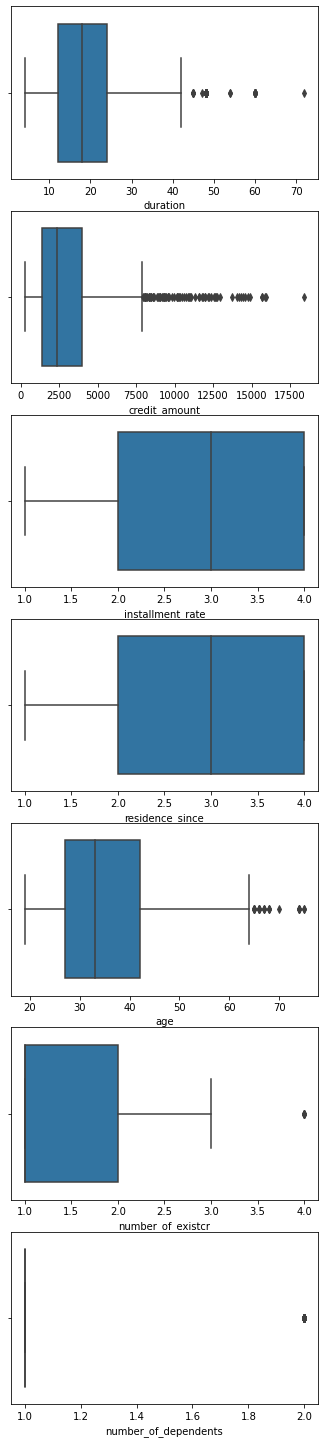

In [15]:
num_rows = len(num_col)
fig, ax = plt.subplots(num_rows, 1 , figsize=(5,20))
fig.tight_layout()
for i in range(num_rows):
  sns.boxplot(x=num_col[i], data=credit, ax=ax[i])

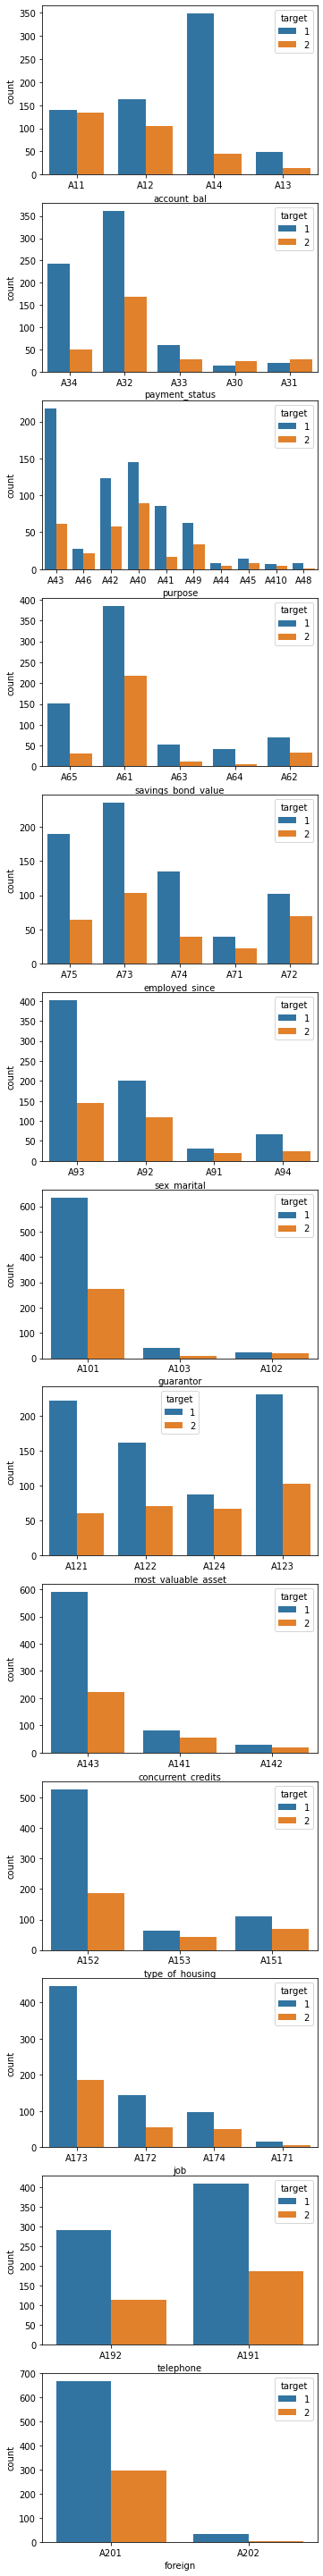

In [53]:
num_rows = len(cat_col)
fig,ax=plt.subplots(num_rows, 1, figsize=(5,40))
fig.tight_layout()
for i in range(num_rows):
  sns.countplot(x=cat_col[i], data=credit, ax=ax[i], hue='target')

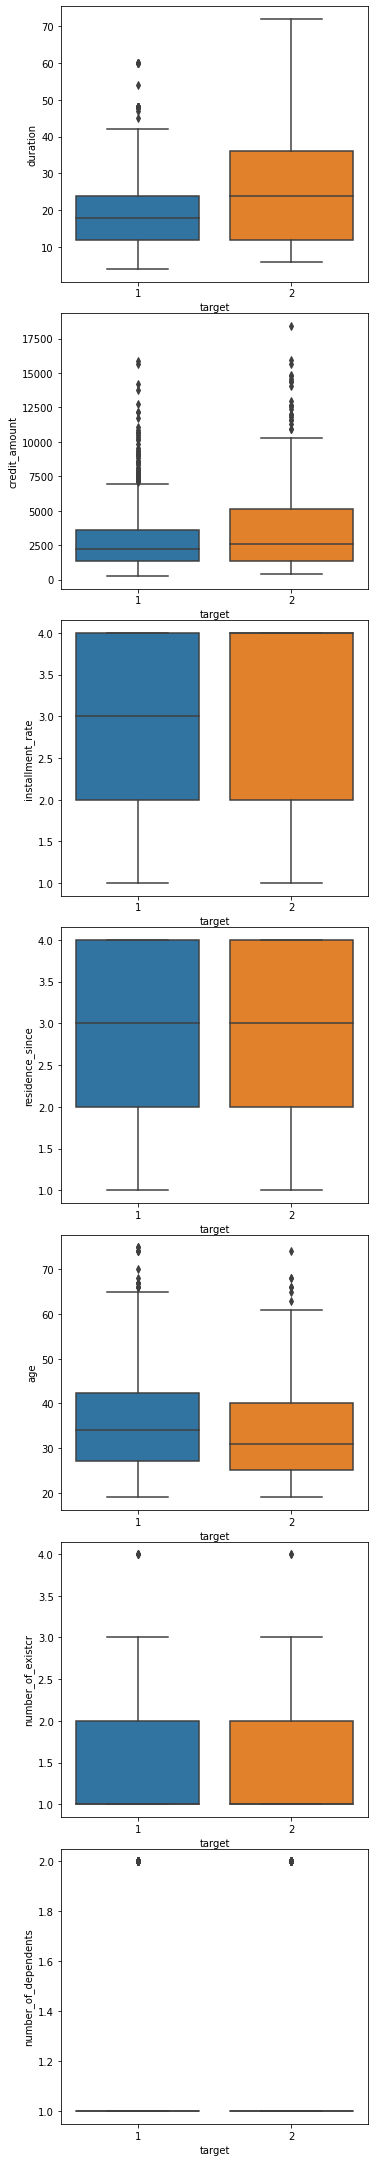

In [18]:
num_rows = len(num_col)
fig,ax=plt.subplots(num_rows, 1, figsize=(5,30))
fig.tight_layout()
for i in range(num_rows):
  sns.boxplot(x='target', y=num_col[i], data=credit, ax=ax[i])

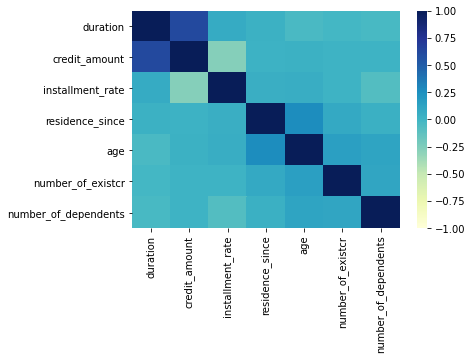

In [23]:
sns.heatmap(credit[num_col].corr(method='pearson'), cmap='YlGnBu', vmin=-1)

In [24]:
credit[num_col].corr(method='pearson')

,duration,credit_amount,installment_rate,residence_since,age,number_of_existcr,number_of_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
number_of_existcr,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
number_of_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [30]:
X = pd.get_dummies(credit, drop_first=True)
X['target'] = np.where(X['target']==2,1,0)
y = X['target']
X = X.drop('target', axis=1)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=52)

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
X_train_scaled2 = pd.DataFrame(X_train_scaled).copy()
X_train_scaled2['target'] = y_train.tolist()
X_train_scaled2_majority = X_train_scaled2.loc[X_train_scaled2['target']==0]
X_train_scaled2_minority = X_train_scaled2.loc[X_train_scaled2['target']==1]
X_train_scaled2_majority_downsample = resample(X_train_scaled2_majority, replace =False, n_samples =len(X_train_scaled2_minority), random_state=52)
X_train_scaled_downsample = pd.concat([X_train_scaled2_majority_downsample,X_train_scaled2_minority])
y_train_downsample = X_train_scaled_downsample['target']
X_train_scaled_downsample = X_train_scaled_downsample.drop('target', axis=1)

In [62]:
y_train_downsample.value_counts()

1    199
0    199
Name: target, dtype: int64

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [66]:
logreg = LogisticRegression(random_state=52)
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
logreg_pred2 = logreg.predict(X_train_scaled)

In [79]:
get_results(y_test, y_train, logreg_pred, logreg_pred2)

Test Confusion Matrix
[[174  25]
 [ 57  44]]

Train Confusion Matrix
[[462  39]
 [102  97]]

Test Report
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       199
           1       0.64      0.44      0.52       101

    accuracy                           0.73       300
   macro avg       0.70      0.66      0.66       300
weighted avg       0.71      0.73      0.71       300


Train Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       501
           1       0.71      0.49      0.58       199

    accuracy                           0.80       700
   macro avg       0.77      0.70      0.72       700
weighted avg       0.79      0.80      0.79       700



In [77]:
logreg2 = LogisticRegression(random_state=52)
logreg2.fit(X_train_scaled_downsample, y_train_downsample)
logreg2_pred = logreg2.predict(X_test_scaled)
logreg2_pred2 = logreg2.predict(X_train_scaled_downsample)

In [80]:
get_results(y_test, y_train_downsample, logreg2_pred, logreg2_pred2)

Test Confusion Matrix
[[141  58]
 [ 25  76]]

Train Confusion Matrix
[[152  47]
 [ 43 156]]

Test Report
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       199
           1       0.57      0.75      0.65       101

    accuracy                           0.72       300
   macro avg       0.71      0.73      0.71       300
weighted avg       0.75      0.72      0.73       300


Train Report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       199
           1       0.77      0.78      0.78       199

    accuracy                           0.77       398
   macro avg       0.77      0.77      0.77       398
weighted avg       0.77      0.77      0.77       398



In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(random_state=52)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_pred2 = rf.predict(X_train_scaled)

In [81]:
get_results(y_test, y_train, rf_pred, rf_pred2)

Test Confusion Matrix
[[180  19]
 [ 72  29]]

Train Confusion Matrix
[[501   0]
 [  0 199]]

Test Report
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       199
           1       0.60      0.29      0.39       101

    accuracy                           0.70       300
   macro avg       0.66      0.60      0.59       300
weighted avg       0.68      0.70      0.66       300


Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00       199

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [82]:
rf2 = RandomForestClassifier(random_state=52)
rf2.fit(X_train_scaled_downsample, y_train_downsample)
rf2_pred = rf2.predict(X_test_scaled)
rf2_pred2 = rf2.predict(X_train_scaled_downsample)

In [83]:
get_results(y_test, y_train_downsample, rf2_pred, rf2_pred2)

Test Confusion Matrix
[[126  73]
 [ 27  74]]

Train Confusion Matrix
[[199   0]
 [  0 199]]

Test Report
              precision    recall  f1-score   support

           0       0.82      0.63      0.72       199
           1       0.50      0.73      0.60       101

    accuracy                           0.67       300
   macro avg       0.66      0.68      0.66       300
weighted avg       0.72      0.67      0.68       300


Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       199

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

